## Introduction

Recognizing digits or characters has long been an common task for deep learning. Since in the past we often conducted this taks on words from English alphabets and Arabic numerals, it must be worth implementing the similar methods on other sources of words or digits and check how well the deep learning can perform!

## Setup

In [1]:
### Load the required packages
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

seed = 100
np.random.seed(seed) # for reproducibility

import warnings
warnings.filterwarnings('ignore')

In [2]:
### Load the data
import os
os.chdir('D:/Dataset/Side_project_Bengli_digit')
print(os.listdir('./BDRW_train_1')[:5]) # some examples

## Labels
labels = pd.read_excel('labels.xls', header=None)
print('\n', labels.head())

## Images
pics = []
from skimage import io 
for ind, file in enumerate(labels[0].values):
    pics.append(io.imread('./BDRW_train_1/'+file+'.jpg'))

pics = np.array(pics)
print('\nHow many pictures are there?\n', pics.shape[0])

['digit_0.jpg', 'digit_1.jpg', 'digit_10.jpg', 'digit_100.jpg', 'digit_1000.jpg']

          0  1
0  digit_0  1
1  digit_1  4
2  digit_2  2
3  digit_3  3
4  digit_4  1

How many pictures are there?
 1393


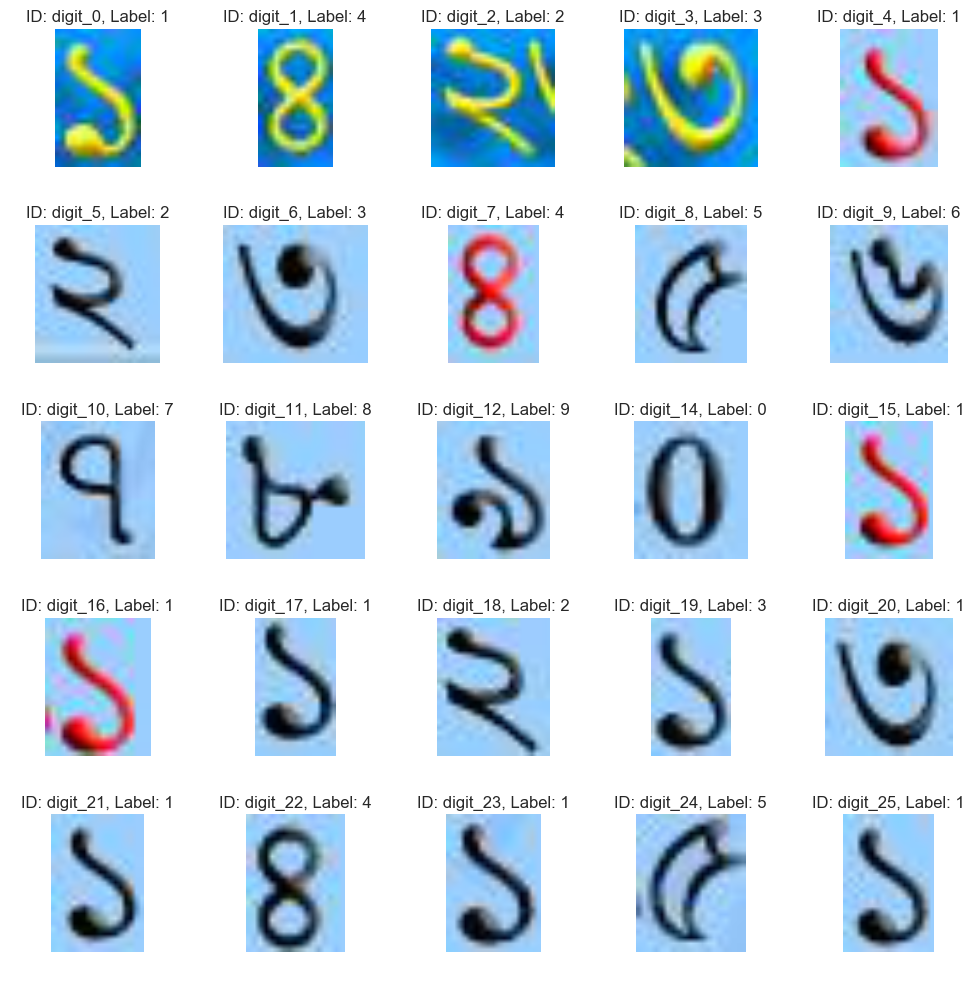

In [3]:
### Quick overview of some examples 
plt.figure(figsize=[10, 10])
for ind, pic in enumerate(pics[:25], start=1):
    plt.subplot(5, 5, ind)
    plt.imshow(pic)
    plt.axis('off')
    plt.title('ID: '+labels[0][ind-1]+', Label: '+str(labels[1][ind-1]))
plt.tight_layout()

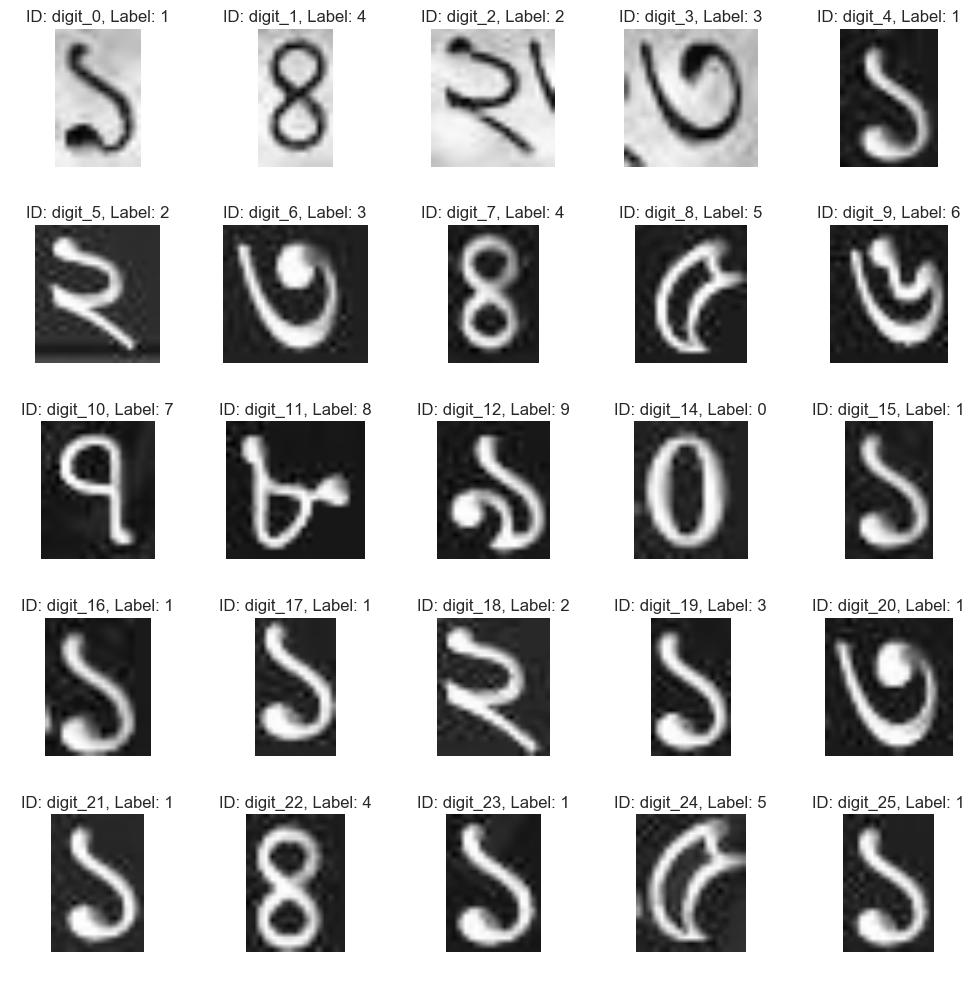

In [4]:
### Overciew in gray scale
from skimage.color import rgb2gray
plt.figure(figsize=[10, 10])
for ind, pic in enumerate(pics[:25], start=1):
    plt.subplot(5, 5, ind)
    plt.imshow(rgb2gray(pic))
    plt.axis('off')
    plt.title('ID: '+labels[0][ind-1]+', Label: '+str(labels[1][ind-1]))
plt.tight_layout()

In [5]:
### split the dataset into training and test
from sklearn.model_selection import train_test_split
train_ind = np.array(train_test_split(labels[1], stratify=labels[1], train_size=0.8,
                                      random_state=seed)[0].index)

pics_tr = pics[train_ind]
pics_test = pics[np.setdiff1d(np.arange(len(pics)), train_ind)]

## EDA and Feature Engineering

#### Transform the pictures to gray scale

To reduce the impacts of differences in color

In [6]:
### Transform each picture to gray scale
pics_tr_gray = np.copy(pics_tr)
for ind, pic in enumerate(pics_tr_gray):
    pics_tr_gray[ind] = rgb2gray(pic)

print(pics_tr_gray[1].shape)

(18, 13)


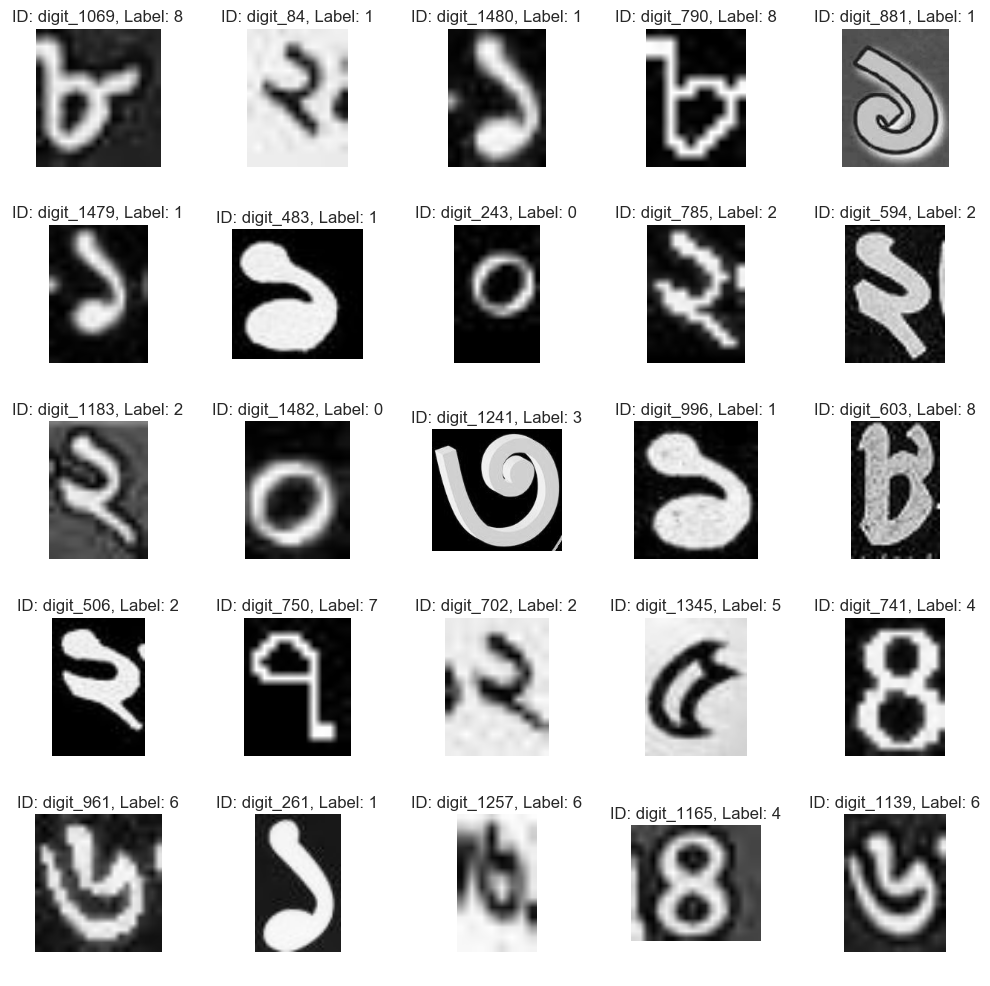

In [7]:
plt.figure(figsize=[10, 10])
for ind, pic in enumerate(pics_tr_gray[:25], start=1):
    plt.subplot(5, 5, ind)
    plt.imshow(pic)
    plt.axis('off')
    plt.title('ID: '+labels[0].values[train_ind][ind-1]+', Label: '+str(labels[1].values[train_ind][ind-1]))
plt.tight_layout()

We can find that there seems to be many noices in the pictures, which may influence the recognition of the patterns of the digits, thus, we would like to remove them using the thresholding.

#### Thresholding

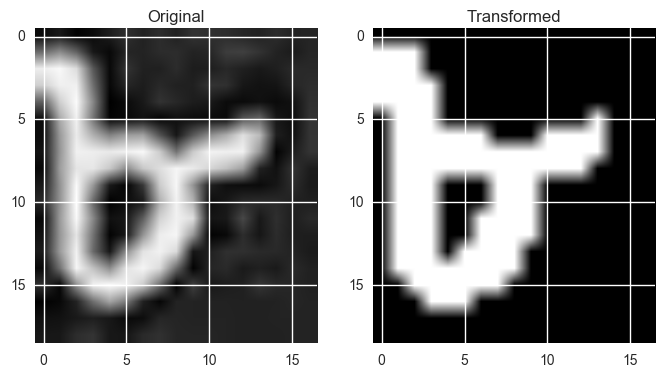

In [8]:
### Thresholding: adaptive
ind = 0
from skimage import filters
pics_tr_gray_adp = filters.threshold_adaptive(pics_tr_gray[ind], 99, 'gaussian')
plt.subplot(1, 2, 1)
plt.imshow(pics_tr_gray[ind])
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(pics_tr_gray_adp)
plt.title('Transformed')

In [9]:
### Transform
for ind, pic in enumerate(pics_tr_gray):
    pics_tr_gray[ind] = filters.threshold_adaptive(pic, 99, 'gaussian')

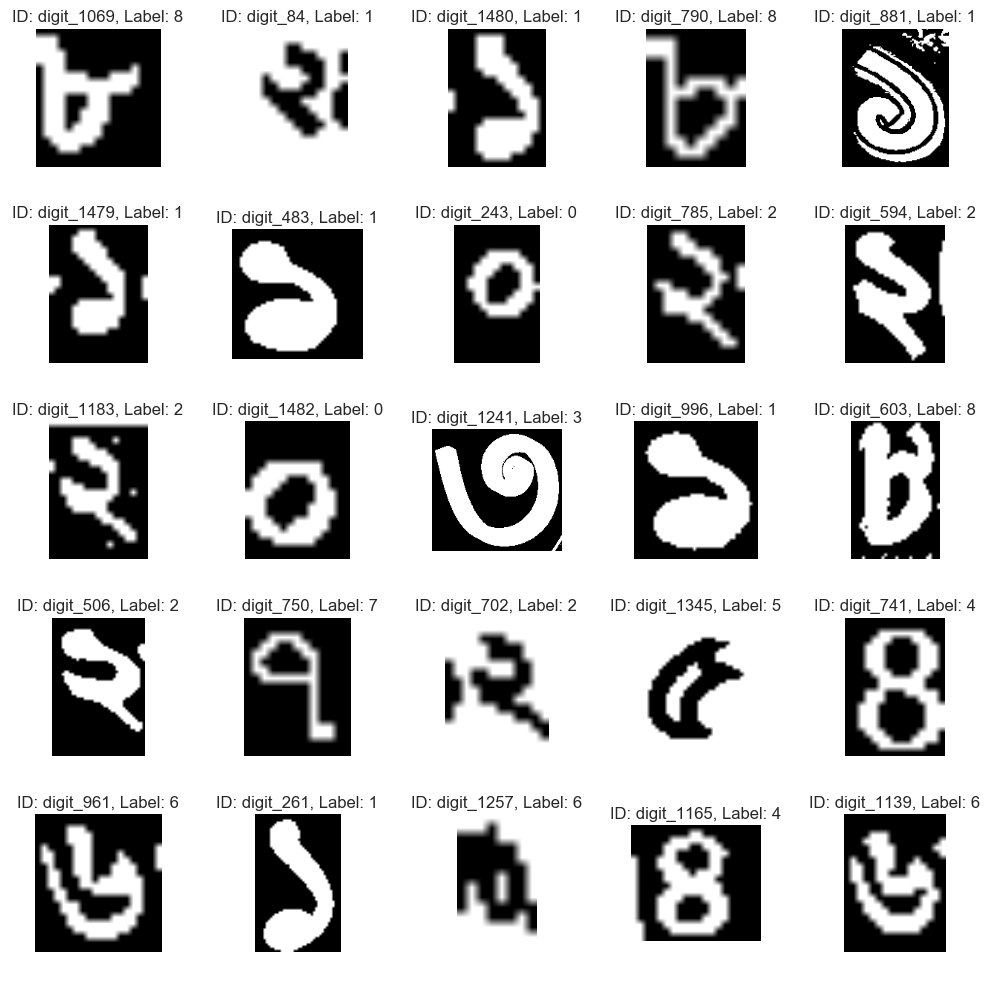

In [10]:
plt.figure(figsize=[10, 10])
for ind, pic in enumerate(pics_tr_gray[:25], start=1):
    plt.subplot(5, 5, ind)
    plt.imshow(pic)
    plt.axis('off')
    plt.title('ID: '+labels[0].values[train_ind][ind-1]+', Label: '+str(labels[1].values[train_ind][ind-1]))
plt.tight_layout()

From the above outcome, we can find that the digits have two colors, the white and the black. I want to make them be more unanimous to make it easier for the model to learn patterns.

#### Make the color unanimous

In [11]:
### Transform the image that has white character to black one
for ind, pic in enumerate(pics_tr_gray):
    if np.mean(pic)>0.5:
        pics_tr_gray[ind] = ~pic*1
    else:
        pics_tr_gray[ind] = pic*1

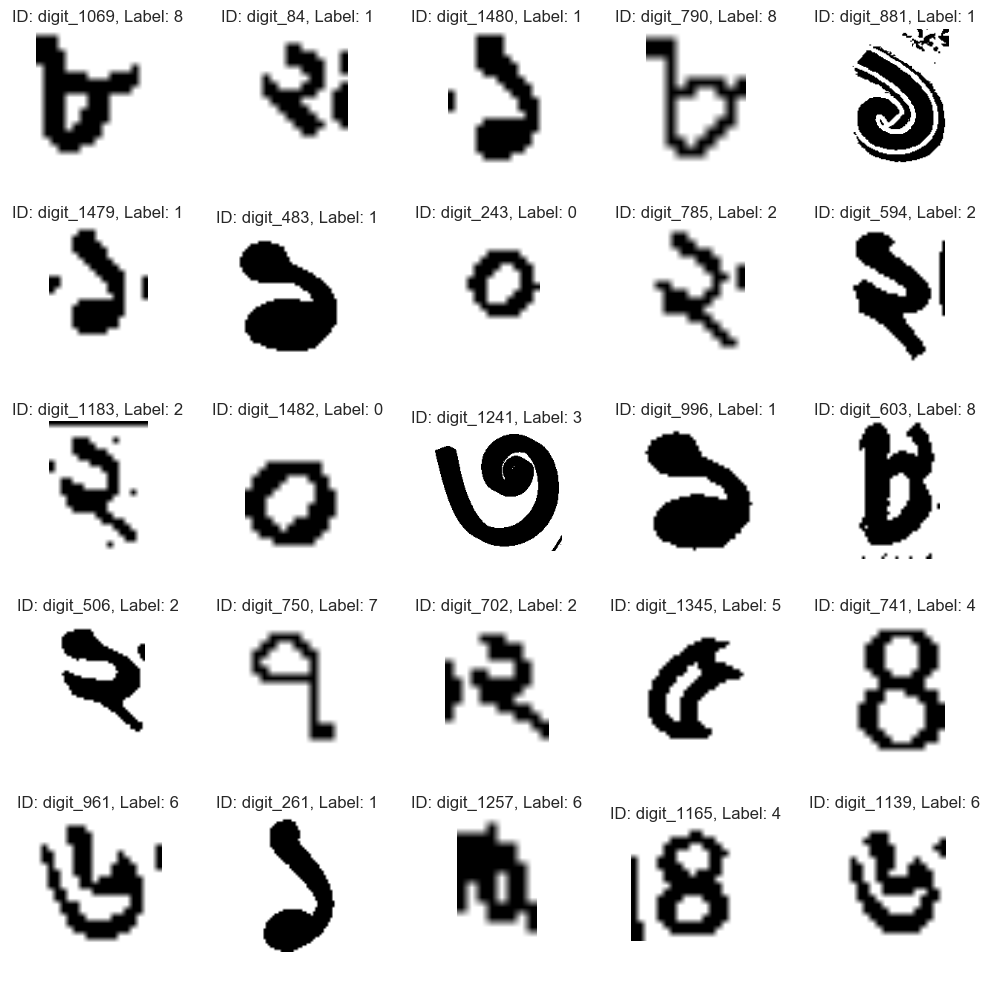

In [12]:
plt.figure(figsize=[10, 10])
for ind, pic in enumerate(pics_tr_gray[:25], start=1):
    plt.subplot(5, 5, ind)
    plt.imshow(pic)
    plt.axis('off')
    plt.title('ID: '+labels[0].values[train_ind][ind-1]+', Label: '+str(labels[1].values[train_ind][ind-1]))
plt.tight_layout()

After changing the colors, I want to resize each image to certain size to help the model learn from features.

#### Resize

(-0.5, 29.5, 29.5, -0.5)

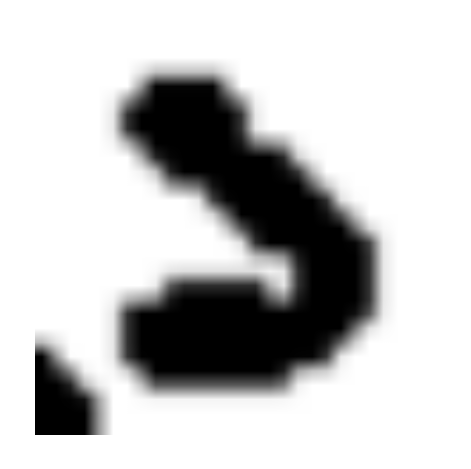

In [13]:
### Resize the sizes of images to make them the same 
# using 30*30
width = 30
height = 30

ind = 125
from skimage.transform import resize
plt.imshow(resize(pics_tr_gray[ind], [height, width], mode='nearest'))
plt.axis('off')

In [14]:
### Resize
for ind, pic in enumerate(pics_tr_gray):
    pics_tr_gray[ind] = resize(pic, [height, width], mode='nearest')

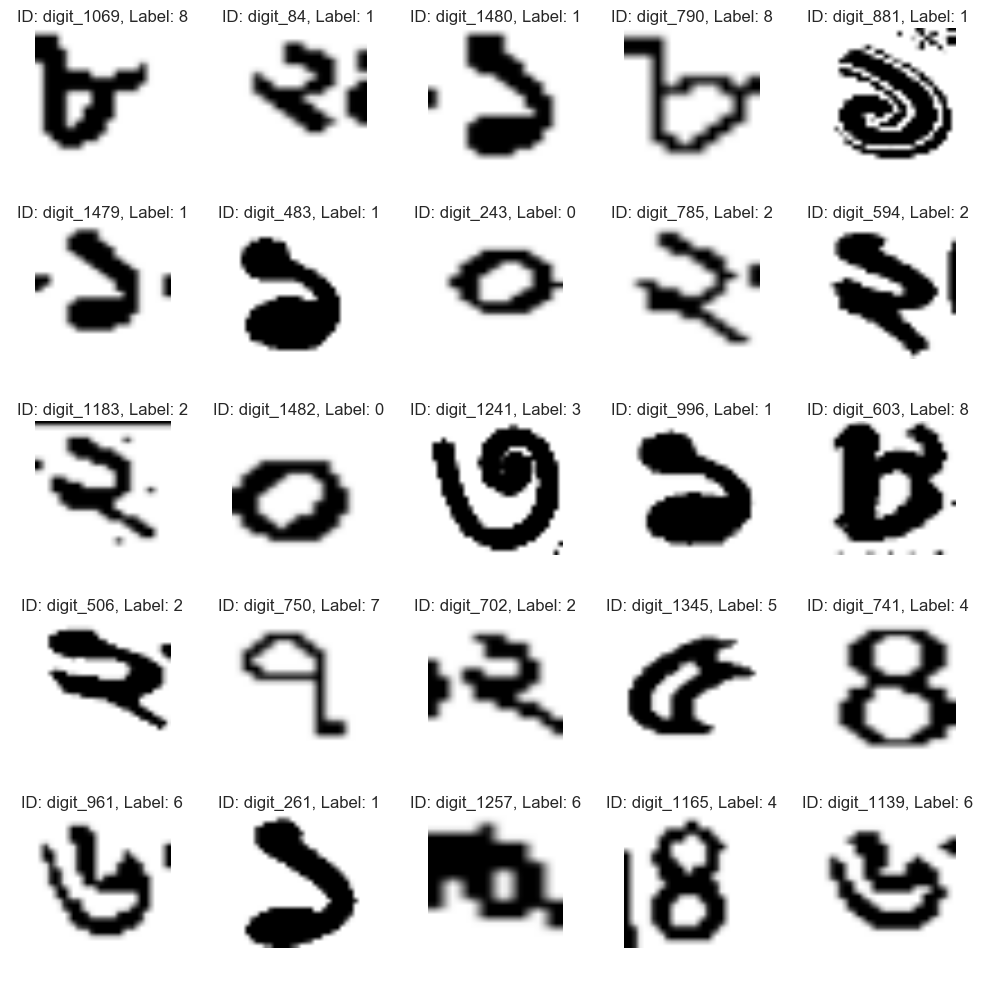

In [15]:
plt.figure(figsize=[10, 10])
for ind, pic in enumerate(pics_tr_gray[:25], start=1):
    plt.subplot(5, 5, ind)
    plt.imshow(pic)
    plt.axis('off')
    plt.title('ID: '+labels[0].values[train_ind][ind-1]+', Label: '+str(labels[1].values[train_ind][ind-1]))
plt.tight_layout()

#### Thresholding again to make the value of pixels to 1 or 0

In [16]:
### Thresholding again
for ind, pic in enumerate(pics_tr_gray):
    pics_tr_gray[ind] = filters.threshold_adaptive(pic, 99, 'gaussian')*1

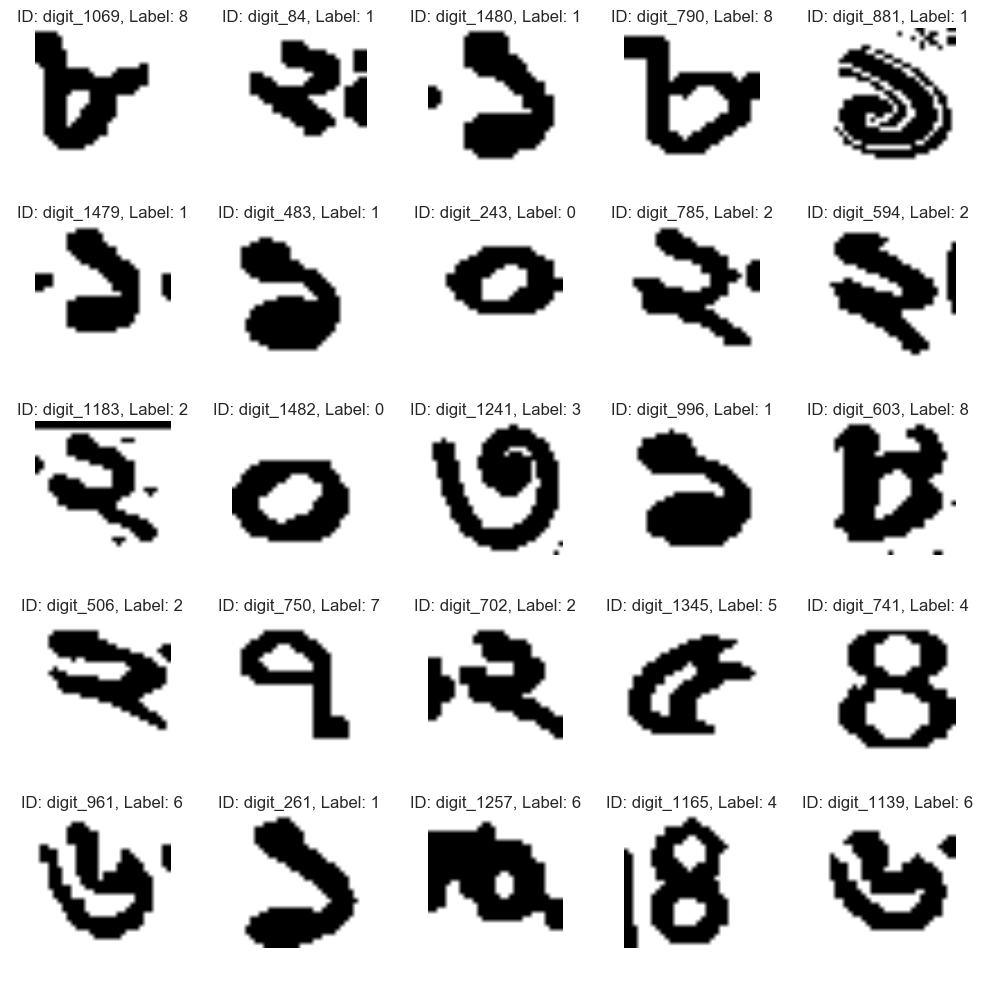

In [17]:
plt.figure(figsize=[10, 10])
for ind, pic in enumerate(pics_tr_gray[:25], start=1):
    plt.subplot(5, 5, ind)
    plt.imshow(pic)
    plt.axis('off')
    plt.title('ID: '+labels[0].values[train_ind][ind-1]+', Label: '+str(labels[1].values[train_ind][ind-1]))
plt.tight_layout()

## Modeling

In [18]:
### Load required packages
np.random.seed(seed)  # for reproducibility
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [19]:
### Reshape the dataset for input into the model
## reshape the dataset
X = []
for pic in pics_tr_gray:
    X.extend(pic.ravel())
X = np.array(X).reshape([pics_tr_gray.shape[0], 30, 30]).reshape([-1, 1, 30, 30])
y = np_utils.to_categorical(labels[1].values[train_ind], nb_classes=10)
print(X.shape)
print(y.shape)

(1114, 1, 30, 30)
(1114, 10)


#### Create stratified k folds for validation while training

In [20]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

#### Modeling and Testing on Validation Sets

In [21]:
accuracy_list = []

for i in range(len(list(skf.split(X, labels[1].values[train_ind])))):
    
    tr_ind = list(skf.split(X, labels[1].values[train_ind]))[i][0]
    valid_ind =  list(skf.split(X, labels[1].values[train_ind]))[i][1]
    
    model = Sequential()

    model.add(Convolution2D(
        nb_filter=32,
        nb_row=5,
        nb_col=5,
        border_mode='same',     
        input_shape=(1, 30, 30)    
    ))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2),
        border_mode='same',    
    ))

    model.add(Convolution2D(64, 5, 5, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2), border_mode='same'))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    adam = Adam(lr=1e-4)

    model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    model.fit(X[tr_ind], y[tr_ind], nb_epoch=200, batch_size=32, verbose=0)
    accuracy_list.append(model.evaluate(X[valid_ind], y[valid_ind], verbose=0)[1])
    print('Accuracy:', model.evaluate(X[valid_ind], y[valid_ind], verbose=0)[1])

print('Done!')

Accuracy: 0.844827577986
Accuracy: 0.885964917509
Accuracy: 0.894736842105
Accuracy: 0.893805309735
Accuracy: 0.911504425834
Accuracy: 0.883928571429
Accuracy: 0.871559633028
Accuracy: 0.917431192661
Accuracy: 0.814814814815
Accuracy: 0.877358488317
Done!


In [22]:
### Average accuracy
print('Average accuracy:')
print(np.mean(accuracy_list))

Average accuracy:
0.879593177342


#### Modeling on the whole training dataset

In [23]:
### Modeling
model = Sequential()

model.add(Convolution2D(
    nb_filter=32,
    nb_row=5,
    nb_col=5,
    border_mode='same',     
    input_shape=(1, 30, 30)    
))
model.add(Activation('relu'))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    border_mode='same',    
))

model.add(Convolution2D(64, 5, 5, border_mode='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), border_mode='same'))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

adam = Adam(lr=1e-4)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X, y, nb_epoch=200, batch_size=32, verbose=0)
print('Done!')

Done!


## Model evaluation

#### Wrapper function for transforming the test dataset

In [24]:
def test_preprocess(df, threshold=99, height=30, width=30):
    
    # gray scale
    from skimage.color import rgb2gray
    
    df_gray = np.copy(df)
    for ind, pic in enumerate(df_gray):
        df_gray[ind] = rgb2gray(pic)
        
    # adaptive threshold
    from skimage import filters
    
    for ind, pic in enumerate(df_gray):
        df_gray[ind] = filters.threshold_adaptive(pic, threshold, 'gaussian')
    
    # white character
    for ind, pic in enumerate(df_gray):
        if np.mean(pic)>0.5:
            df_gray[ind] = ~pic*1
        else:
            df_gray[ind] = pic*1

    # resize
    from skimage.transform import resize
    
    for ind, pic in enumerate(df_gray):
        df_gray[ind] = resize(pic, [height, width], mode='nearest')
    
    # adaptive threshold
    for ind, pic in enumerate(df_gray):
        df_gray[ind] = filters.threshold_adaptive(pic, threshold, 'gaussian')*1
    
    # reshape
    X = []
    for pic in df_gray:
        X.extend(pic.ravel())

    X = np.array(X).reshape([df_gray.shape[0], 30, 30]).reshape([-1, 1, 30, 30])
    
    return X

#### Accuracy

In [57]:
X_test = test_preprocess(pics_test)   
y_test = labels[1].values[np.setdiff1d(np.arange(len(pics)), train_ind)]
y_true = np_utils.to_categorical(y_test, nb_classes=10)
print('Accuracy:', model.evaluate(X_test, y_true, verbose=0)[1])

Accuracy: 0.910394267797


#### Confusion matrix

In [26]:
y_pred = np.argmax(model.predict(X_test), axis=1)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[29  0  0  1  0  3  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  2]
 [ 0  1 39  0  0  0  1  0  0  1]
 [ 0  0  0 26  1  0  0  0  0  0]
 [ 1  0  0  1 21  2  0  0  0  0]
 [ 0  0  0  2  1 22  0  0  0  0]
 [ 0  0  0  1  0  0 18  1  0  0]
 [ 0  0  0  0  0  0  0 18  0  0]
 [ 0  1  0  0  0  0  1  0 15  0]
 [ 0  2  1  0  1  0  0  0  0 12]]


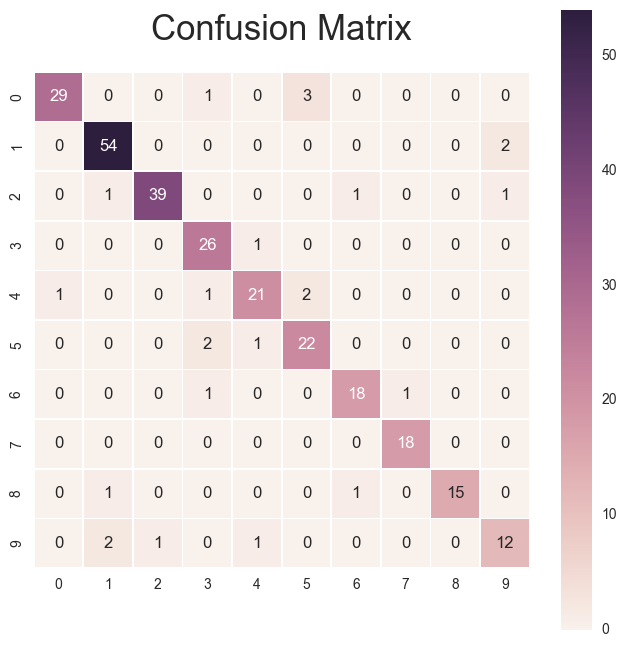

In [56]:
### Visualization
plt.figure(figsize=[8, 8])
sns.heatmap(confusion_matrix(y_test, y_pred), square=True, xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test), annot=True, linewidths=.5)
plt.title('Confusion Matrix', fontsize=25, y=1.05)

#### Precision, Recall and F1 score

In [28]:
from sklearn.metrics import precision_recall_fscore_support


ppf = precision_recall_fscore_support(y_test, y_pred)
for ind, met in enumerate(['Precision', 'Recall', 'F1']):
    print(met+': '+'Best: '+str(np.argmax(ppf[ind]))+', '+'Worst: '+str(np.argmin(ppf[ind])))

(array([ 0.96666667,  0.93103448,  0.975     ,  0.83870968,  0.875     ,
        0.81481481,  0.9       ,  0.94736842,  1.        ,  0.8       ]), array([ 0.87878788,  0.96428571,  0.92857143,  0.96296296,  0.84      ,
        0.88      ,  0.9       ,  1.        ,  0.88235294,  0.75      ]), array([ 0.92063492,  0.94736842,  0.95121951,  0.89655172,  0.85714286,
        0.84615385,  0.9       ,  0.97297297,  0.9375    ,  0.77419355]), array([33, 56, 42, 27, 25, 25, 20, 18, 17, 16], dtype=int64))

Precision: Best: 8, Worst: 9
Recall: Best: 7, Worst: 9
F1: Best: 7, Worst: 9


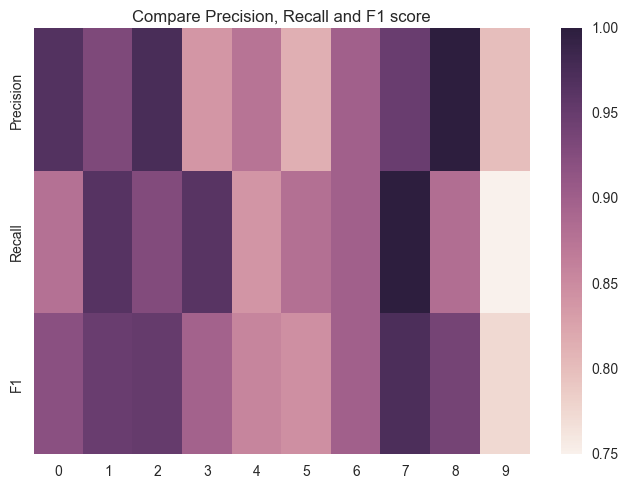

In [55]:
ppf_tab = pd.DataFrame(columns = range(10), index = ['Precision', 'Recall', 'F1'])
for i in range(3):
    ppf_tab.ix[i, :] = precision_recall_fscore_support(y_test, y_pred)[i]

ppf_tab
sns.heatmap((ppf_tab.values.astype(float)), xticklabels=ppf_tab.columns, yticklabels=list(ppf_tab.index))
plt.title('Compare Precision, Recall and F1 score')

## Conclusion

After the first attempt, I can do further analysis on the following things:
* Try other new methods of creating useful features
* Construct the network of CNN model using different structures